In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_context("talk")
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import HoverTool


In [19]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv("data_w_genres.csv")

In [20]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [21]:
@widgets.interact_manual(
    Year = range(1921,2021))
def plot(Year = 2020):
    arpop = data[data['year'] == Year]
    arpop = pd.DataFrame(arpop.groupby('artists')['popularity'].sum()).sort_values('popularity').tail(10).reset_index()
    fig = plt.figure(figsize=(12,4))
    plt.bar( arpop['artists'],
             arpop['popularity'],
             width=0.45,
             color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
    plt.xticks(rotation=45,ha='right')
    t='Top 10 Most Popular Artists from '+str(Year)
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel('Artists')
    plt.ylabel('Popularity (Ranges from 0 to 100)')
  


interactive(children=(Dropdown(description='Year', index=99, options=(1921, 1922, 1923, 1924, 1925, 1926, 1927…

,artists,popularity
0,['Johnny Cash'],13105
1,['The Beach Boys'],13789
2,['Queen'],13802
3,['Fleetwood Mac'],13880
4,['Led Zeppelin'],13999
5,['Frank Sinatra'],15324
6,['Elvis Presley'],16343
7,['Bob Dylan'],16628
8,['The Rolling Stones'],17670
9,['The Beatles'],19711


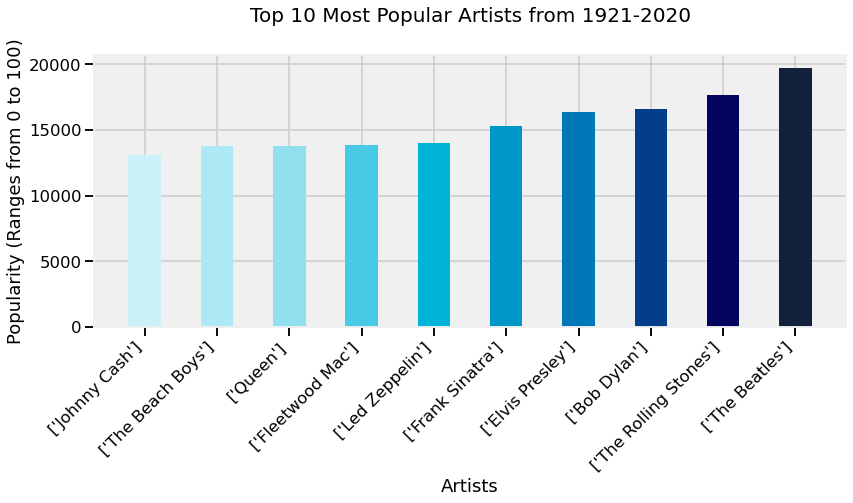

In [22]:
arpop = pd.DataFrame(data.groupby('artists')['popularity'].sum()).sort_values('popularity').tail(10).reset_index()
fig = plt.figure(figsize=(12,5))
plt.bar( arpop['artists'],
         arpop['popularity'],
         width=0.45,
         color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Most Popular Artists from 1921-2020',y=1.1,fontsize=20)
plt.xlabel('Artists')
plt.ylabel('Popularity (Ranges from 0 to 100)')
arpop


interactive(children=(Dropdown(description='Year', index=99, options=(1921, 1922, 1923, 1924, 1925, 1926, 1927…

Text(0, 0.5, 'Popularity (Ranges from 0 to 100)')

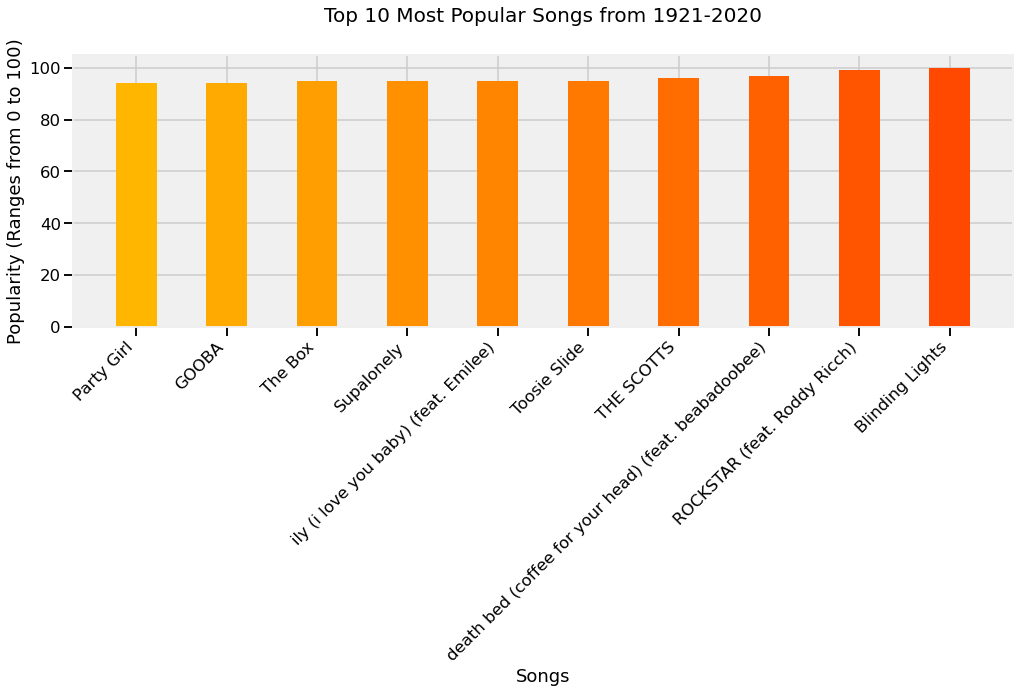

In [7]:
pop = data[['name','popularity']].sort_values('popularity').tail(10)
fig = plt.figure(figsize=(15,5))
plt.bar( pop['name'],
         pop['popularity'],
         width=0.45,
         color = ['#ffb600','#ffaa00','#ff9e00','#ff9100','#ff8500','#ff7900','#ff6d00','#ff6000','#ff5400','#ff4800'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Most Popular Songs from 1921-2020',y=1.1,fontsize=20)
plt.xlabel('Songs')
plt.ylabel('Popularity (Ranges from 0 to 100)')


In [25]:
%matplotlib notebook
df=data[['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness']]
df['popularity']=pd.DataFrame(data['popularity']/10).apply(np.floor).astype(int)
df['popularity']=df['popularity']*10
df=df.groupby('popularity')['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness'].mean().reset_index()
color1=['#440047','#e11d74','#96bb7c','#fddb3a','#00bcd4','#ff5722','#ffa5b0']
# Multiple Lines
fig = figure(title='Multi-Line Chart Example', width=1000, height=500)
# Draw two lines
x=df['popularity']
y1=df['danceability']
y2=df['valence']
y3=df['instrumentalness']
y4=df['liveness']
y5= df['speechiness']
y6=df['acousticness']
y7=df['valence']
fig.multi_line([x,x,x,x,x,x,x], [y1, y2,y3,y4,y5,y6,y7],
               color=['blue','red','green','purple','brown','pink','black'], 
               alpha=[ 0.2,0.4,0.6,0.8,1,1], 
               line_width=2)
# Show the figure
show(fig)
fig = figure(title='popularity of various songs vs features', width=1000, height=500)
fig.line(x, y1, legend_label='y=danceability', color='blue')
fig.line(x, y2, legend_label='y=valence', color='red')
fig.line(x, y3, legend_label='y=instrumentalness', color='green')
fig.line(x, y4, legend_label='y=liveness', color='purple')
fig.line(x, y5, legend_label='y=speechiness', color='brown')
fig.line(x, y6, legend_label='y=acousticness', color='pink')
fig.line(x, y7, legend_label='y=valence', color='black')
# Relocate Legend
fig.legend.location = 'top_left'
# Click to hide/show lines
fig.legend.click_policy = 'hide'

fig.add_tools(HoverTool(
    tooltips=[
        ('value, popularity)', '(@x, @y)')
    ]
))
show(fig)

,0,1,2,3,4,5,6,7,8,9,10
popularity,0.000000,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000
acousticness,0.863795,0.742567,0.476696,0.369846,0.313366,0.280558,0.271114,0.235866,0.235711,0.234824,0.001460
danceability,0.494134,0.496226,0.515050,0.538754,0.557932,0.575349,0.605158,0.647021,0.690125,0.741860,0.514000
energy,0.269922,0.344803,0.493502,0.552876,0.601010,0.622878,0.616849,0.634165,0.629882,0.619767,0.730000
instrumentalness,0.328902,0.199440,0.137521,0.125607,0.101346,0.075652,0.067168,0.025769,0.015693,0.026080,0.000095
valence,0.507459,0.523396,0.563518,0.559904,0.543842,0.521803,0.498123,0.509246,0.510645,0.537221,0.334000
liveness,0.220625,0.213131,0.224357,0.207206,0.198492,0.190607,0.181841,0.177676,0.165254,0.205347,0.089700
speechiness,0.150388,0.080939,0.064980,0.068966,0.078283,0.079915,0.096159,0.104078,0.103342,0.136340,0.059800
